In [1]:
import ijson
import collections
import pprint
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load the documents into a documents list
documents = []

with open("../data/sample_100.json", "rb") as j:
    for record in ijson.items(j, "item"):
        documents.append(record)

In [3]:
len(documents)

100

In [4]:
# for doc in documents:
#     print(doc['document_title'])
print(documents[0])

{'document_identifier': '003c615130e27d8aaf56d1bd608cca98', 'document_title': 'Contaminatie in het vlees van ‘grote grazers’ in uiterwaarden', 'type_primary': 'Kamerstuk', 'type_secondary': 'Brief', 'published': '2022-12-14 00:00:00', 'publisher': {'role': 'Publisher', 'person': None, 'function': None, 'organisation': 'Tweede Kamer', 'department': None}, 'source': {'site': 'tweedekamer.nl', 'label': 'Tweede Kamer'}, 'document_url': 'https://gegevensmagazijn.tweedekamer.nl/OData/v4/2.0/Document(1b886d7f-1317-4474-af38-64cb07ab4ade)/resource', 'author': [{'role': 'Eerste ondertekenaar', 'person': 'E.J. Kuipers', 'function': 'minister van Volksgezondheid, Welzijn en Sport', 'organisation': 'Tweede Kamer', 'department': None}], 'subjects': [], 'content': '> Retouradres Postbus 20350 2500 EJ Den Haag De Voorzitter van de Tweede Kamer der Staten-Generaal Postbus 20018 2500 EA DEN HAAG Bezoekadres: Parnassusplein 5 2511 VX Den Haag www.rijksoverheid.nl Kenmerk 3477122-1040635-VGP Uw brief Bij

In [5]:
# Print all sentence entries and all their attributes
for doc in documents:
    print(doc['document_title'])
    sentences = doc['sentences']
    for sent in sentences:
        sentence_entries = sent['ner_tags']['flair/ner-dutch-large']
        for entry in sentence_entries:
            if entry['ner_label'] in ['ORG', 'PER']:
                print(entry)

Contaminatie in het vlees van ‘grote grazers’ in uiterwaarden
{'end_position': 33, 'ner_label': 'ORG', 'score': '0.9997401237487793', 'start_position': 21, 'text': 'Tweede Kamer'}
{'end_position': 52, 'ner_label': 'ORG', 'score': '0.9888216257095337', 'start_position': 38, 'text': 'StatenGeneraal'}
{'end_position': 8, 'ner_label': 'ORG', 'score': '0.9976308345794678', 'start_position': 3, 'text': 'Kamer'}
{'end_position': 27, 'ner_label': 'ORG', 'score': '0.9998880426088969', 'start_position': 0, 'text': 'Stichting Taurus Kamerstuk'}
{'end_position': 22, 'ner_label': 'ORG', 'score': '0.9932377338409424', 'start_position': 18, 'text': 'NVWA'}
{'end_position': 61, 'ner_label': 'ORG', 'score': '0.9846854209899902', 'start_position': 33, 'text': 'Risicobeoordeling Onderzoek'}
{'end_position': 66, 'ner_label': 'ORG', 'score': '0.9999837875366211', 'start_position': 62, 'text': 'BuRO'}
{'end_position': 8, 'ner_label': 'ORG', 'score': '0.9256953597068787', 'start_position': 3, 'text': 'Kamer'

{'end_position': 92, 'ner_label': 'ORG', 'score': '0.9999911189079285', 'start_position': 70, 'text': 'Ecologische Autoriteit'}
{'end_position': 39, 'ner_label': 'ORG', 'score': '0.9999878406524658', 'start_position': 35, 'text': 'RIVM'}
{'end_position': 54, 'ner_label': 'ORG', 'score': '0.9999880790710449', 'start_position': 50, 'text': 'RIVM'}
{'end_position': 93, 'ner_label': 'ORG', 'score': '0.9999897480010986', 'start_position': 90, 'text': 'NH3'}
{'end_position': 100, 'ner_label': 'ORG', 'score': '0.9999903440475464', 'start_position': 97, 'text': 'NOx'}
{'end_position': 34, 'ner_label': 'ORG', 'score': '0.9999877214431763', 'start_position': 31, 'text': 'NH3'}
{'end_position': 254, 'ner_label': 'ORG', 'score': '0.9999727010726929', 'start_position': 251, 'text': 'NH3'}
{'end_position': 42, 'ner_label': 'PER', 'score': '0.9999829530715942', 'start_position': 35, 'text': 'Boswijk'}
{'end_position': 36, 'ner_label': 'PER', 'score': '0.9999856948852539', 'start_position': 29, 'text'

{'end_position': 25, 'ner_label': 'ORG', 'score': '0.9998656511306763', 'start_position': 20, 'text': 'Kamer'}
{'end_position': 44, 'ner_label': 'ORG', 'score': '0.9999876817067465', 'start_position': 11, 'text': 'Stichting Nationale Koolstofmarkt'}
{'end_position': 45, 'ner_label': 'PER', 'score': '0.9999969005584717', 'start_position': 37, 'text': 'De Groot'}
{'end_position': 96, 'ner_label': 'ORG', 'score': '0.9999873638153076', 'start_position': 93, 'text': 'LNV'}
{'end_position': 103, 'ner_label': 'ORG', 'score': '0.9999914169311523', 'start_position': 100, 'text': 'BZK'}
{'end_position': 56, 'ner_label': 'PER', 'score': '0.9999939203262329', 'start_position': 49, 'text': 'Grinwis'}
{'end_position': 47, 'ner_label': 'PER', 'score': '0.9999926090240479', 'start_position': 40, 'text': 'Grinwis'}
{'end_position': 14, 'ner_label': 'PER', 'score': '0.9999743700027466', 'start_position': 9, 'text': 'Adema'}
{'end_position': 54, 'ner_label': 'PER', 'score': '0.9999899864196777', 'start_p

{'end_position': 214, 'ner_label': 'ORG', 'score': '0.9779477715492249', 'start_position': 210, 'text': 'PFAS'}
{'end_position': 10, 'ner_label': 'ORG', 'score': '0.986228346824646', 'start_position': 6, 'text': 'PFAS'}
{'end_position': 154, 'ner_label': 'ORG', 'score': '0.9999961256980896', 'start_position': 142, 'text': 'Tweede Kamer'}
{'end_position': 118, 'ner_label': 'ORG', 'score': '0.9996871749560038', 'start_position': 94, 'text': 'Aanpak opkomende stoffen'}
{'end_position': 4, 'ner_label': 'ORG', 'score': '0.9962342381477356', 'start_position': 0, 'text': 'PFAS'}
{'end_position': 40, 'ner_label': 'ORG', 'score': '0.9999877214431763', 'start_position': 37, 'text': 'TNO'}
{'end_position': 61, 'ner_label': 'ORG', 'score': '0.9999840259552002', 'start_position': 57, 'text': 'IenW'}
{'end_position': 21, 'ner_label': 'ORG', 'score': '0.9999932646751404', 'start_position': 3, 'text': 'Europese Commissie'}
{'end_position': 58, 'ner_label': 'ORG', 'score': '0.9999940395355225', 'start_

{'end_position': 84, 'ner_label': 'ORG', 'score': '0.9999951124191284', 'start_position': 66, 'text': 'Europees Parlement'}
{'end_position': 12, 'ner_label': 'PER', 'score': '0.9995819926261902', 'start_position': 3, 'text': 'Ministers'}
{'end_position': 55, 'ner_label': 'ORG', 'score': '0.9999613761901855', 'start_position': 52, 'text': 'GLB'}
{'end_position': 141, 'ner_label': 'ORG', 'score': '0.9999958872795105', 'start_position': 128, 'text': 'Europese Unie'}
{'end_position': 243, 'ner_label': 'ORG', 'score': '0.9999726414680481', 'start_position': 231, 'text': 'Tweede Kamer'}
{'end_position': 88, 'ner_label': 'ORG', 'score': '0.8130043148994446', 'start_position': 77, 'text': 'Voltfractie'}
{'end_position': 199, 'ner_label': 'ORG', 'score': '0.999993622303009', 'start_position': 176, 'text': 'Landbouwen Visserijraad'}
{'end_position': 84, 'ner_label': 'ORG', 'score': '0.9999871969223022', 'start_position': 59, 'text': 'Raad van de Europese Unie'}
{'end_position': 75, 'ner_label': 

{'end_position': 110, 'ner_label': 'ORG', 'score': '0.9998923540115356', 'start_position': 105, 'text': 'Kamer'}
{'end_position': 166, 'ner_label': 'ORG', 'score': '0.9705848097801208', 'start_position': 162, 'text': 'Raad'}
{'end_position': 237, 'ner_label': 'ORG', 'score': '0.9999948740005493', 'start_position': 219, 'text': 'Europese Commissie'}
{'end_position': 102, 'ner_label': 'ORG', 'score': '0.9999867677688599', 'start_position': 100, 'text': 'EU'}
{'end_position': 19, 'ner_label': 'ORG', 'score': '0.9999905824661255', 'start_position': 16, 'text': 'LNV'}
{'end_position': 105, 'ner_label': 'ORG', 'score': '0.9999899864196777', 'start_position': 103, 'text': 'IW'}
{'end_position': 127, 'ner_label': 'ORG', 'score': '0.9999871253967285', 'start_position': 122, 'text': 'Kamer'}
{'end_position': 4, 'ner_label': 'ORG', 'score': '0.9999269247055054', 'start_position': 0, 'text': 'JA21'}
{'end_position': 88, 'ner_label': 'ORG', 'score': '0.9999961256980896', 'start_position': 76, 'text

{'end_position': 21, 'ner_label': 'ORG', 'score': '0.9999904632568359', 'start_position': 18, 'text': 'RVB'}
{'end_position': 63, 'ner_label': 'ORG', 'score': '0.999941349029541', 'start_position': 60, 'text': 'LNV'}
{'end_position': 15, 'ner_label': 'ORG', 'score': '0.9999805688858032', 'start_position': 0, 'text': 'Staatsbosbeheer'}
{'end_position': 15, 'ner_label': 'ORG', 'score': '0.9999830722808838', 'start_position': 0, 'text': 'Staatsbosbeheer'}
{'end_position': 73, 'ner_label': 'ORG', 'score': '0.9999749660491943', 'start_position': 58, 'text': 'Staatsbosbeheer'}
{'end_position': 71, 'ner_label': 'ORG', 'score': '0.9999850988388062', 'start_position': 56, 'text': 'Staatsbosbeheer'}
{'end_position': 12, 'ner_label': 'ORG', 'score': '0.9999955892562866', 'start_position': 0, 'text': 'Tweede Kamer'}
{'end_position': 64, 'ner_label': 'ORG', 'score': '0.9999866485595703', 'start_position': 61, 'text': 'LNV'}
{'end_position': 119, 'ner_label': 'ORG', 'score': '0.9999627470970154', 's

In [6]:
per_list = []
org_list = []

# Disable prettyprint automatic sorting
pprint.sorted = lambda x, key=None: x

# Add every sentence entry with ner label ORG (Organization) and PER (Person) to seperate lists
for doc in documents:
    sentences = doc['sentences']
    for sent in sentences:
        sentence_entries = sent['ner_tags']['flair/ner-dutch-large']
        for entry in sentence_entries:
            if entry['ner_label'] == 'PER':
                per_list.append(entry['text'])
            if entry['ner_label'] == 'ORG':
                org_list.append(entry['text'])


# Create frequency list and sort by frequency for PER entries
freq_per = collections.Counter(per_list)
freq_per_sorted = dict(sorted(freq_per.items(), key=lambda item: item[1], reverse=True))

# Create frequency list and sort by frequency for ORG entries
freq_org = collections.Counter(org_list)
freq_org_sorted = dict(sorted(freq_org.items(), key=lambda item: item[1], reverse=True))

The frequency list of persons below is from all the documents. We've found that the data contains legitimate a lot names that are correct, a lot of names that are partly correct, but also a lot of names that are erronous. We have to implement a filter step to filter step to completely remove these erronous values and we need to find common errors in partly correct names which may be able to be corrected. If these partly correct names are beyond saving we need to exclude them from the list. Furthermore if we take the example of the most frequent 'person' in these documents we find that 'minister' is the most frequent. However context is very improtant for this person as it will in most cases refer to the minister which is most likely mentioned earlier in the document. We need to find a way to determine which minister is referred to in the document.

In [7]:
pprint.pprint(freq_per_sorted)

{'Minister': 236,
 'dev': 110,
 'Bovengrens': 110,
 'De Groot': 81,
 'Van der Plas': 80,
 'CJ Schouten': 73,
 'Tjeerd de Groot': 68,
 'Wo Ind': 56,
 'px80': 54,
 'AW': 54,
 'Bromet': 48,
 'Boswijk': 38,
 'Van Campen': 38,
 'Adema': 36,
 'Grinwis': 35,
 'Vestering': 34,
 'Thijssen': 34,
 'KM': 32,
 'Valstar': 31,
 'HM de Jonge': 31,
 'Bisschop': 30,
 'M': 29,
 'Ouwehand': 25,
 'Staghouwer': 25,
 'Beckerman': 24,
 'I': 23,
 'H Staghouwer': 22,
 'DE VAN SALLAND': 21,
 'Jetten': 20,
 'Schouten': 19,
 'T': 19,
 'Wassenberg': 18,
 'Remkes': 18,
 'KH Ollongren': 16,
 'B Visser': 15,
 'WB Hoekstra': 14,
 'RP Jansma': 13,
 'P Blokhuis': 13,
 'BB RB': 13,
 'FBJ Grapperhaus': 12,
 'C0Def': 12,
 'RW Knops': 10,
 'HPM Knapen': 10,
 'J van de Zand': 10,
 'Aa': 10,
 'Van Raan': 9,
 'AD Wiersma': 9,
 'Ch van der WalZeggelink': 9,
 'GS': 9,
 'Heijnen': 9,
 'van Weyenberg': 8,
 'Verkenner': 8,
 'TB': 8,
 'RB': 8,
 'Staatssecretaris': 8,
 'VAN': 7,
 'LNV': 7,
 'S Dekker': 7,
 'Graus': 7,
 'BB': 7,
 'Van 

 'PA Grinwis': 1,
 'Wassenberg2': 1,
 'Rutte': 1,
 'oa': 1,
 'Douwe Hoogland': 1,
 'Jan van Weperen': 1,
 'Roel de Jong': 1,
 'Aldeboarnde Deelen': 1,
 'De Romte Diele': 1,
 'Oerlis Feangreide': 1,
 'HM LEEUWARDEN': 1,
 'Daniël Hartog': 1,
 'Bisschop cs2': 1,
 'Boswijk6': 1,
 'De Vries': 1,
 'Eijs': 1,
 'Veldhoven': 1,
 'Koolmees': 1,
 'F28': 1,
 'DG': 1,
 'tbv': 1,
 'Landen': 1,
 'BLC': 1,
 'Lening Rente': 1,
 'Zbo': 1,
 'RWT': 1,
 'Bouchallikh': 1,
 'Piet Adema': 1,
 'mbo': 1,
 'Eerdmans': 1,
 'CBD': 1,
 'Copernicus': 1,
 'Van RaanfootnoteRef35': 1,
 'Jutta Paulus': 1,
 'Mick Wallace': 1,
 'Sneller': 1}


In [8]:
len(freq_per_sorted)

594

The same goes for organizations, there are correct, partly correct and erronous values included in the list. We need to check if there are common mistakes in the organisation names (e.g. numbers in front of organisation names) that can be easily fixed. The erronous values have to be completely removed from the list.

In [9]:
pprint.pprint(freq_org_sorted)

{'Kamer': 356,
 'Tweede Kamer': 316,
 'LNV': 309,
 'Landbouw Natuur en Voedselkwaliteit': 231,
 'Europese Commissie': 228,
 'EU': 219,
 'Commissie': 199,
 'Rijk': 171,
 'NVWA': 130,
 'NSP': 122,
 'NMP': 114,
 'GLB': 99,
 'PS': 92,
 'PFOA': 91,
 'PFAS': 88,
 'Raad': 77,
 'Landbouwen Visserijraad': 71,
 'RIVM': 68,
 'D66': 68,
 'Infrastructuur en Waterstaat': 63,
 'Volksgezondheid Welzijn en Sport': 58,
 'GenX': 58,
 'Zaak': 58,
 'Economische Zaken': 57,
 'BBB': 57,
 'PFOS': 56,
 'P95': 56,
 'varco': 54,
 'Bureau Risicobeoordeling': 54,
 'Europese Unie': 53,
 'Tweede Kamer der StatenGeneraal': 52,
 'IenW': 51,
 'NRD NATIONAAL': 51,
 'Natuur en Stikstof': 48,
 'Klimaat': 48,
 'VVD': 48,
 'GroenLinks': 46,
 'Financiën': 46,
 'NPLG': 46,
 'Landbouw Natuur': 45,
 'Buitenlandse Zaken': 43,
 'PvdD': 42,
 'Ctgb': 42,
 'GS': 42,
 'StatenGeneraal': 41,
 'Cie': 40,
 'Europees Parlement': 36,
 'TCRVWA20225299': 35,
 'Binnenlandse Zaken': 34,
 'Partij voor de Dierenfractie': 33,
 'YTQFEJ4WDKYW407687

 'Agrarisch Natuur en Landschapsbeheer': 1,
 'Gemeenschappelijk Landbouwbeleid': 1,
 'Vogelonderzoek Nederland': 1,
 'Vlinderstichting RAVON': 1,
 'Netwerk Ecologische Monitoring NEM': 1,
 'Landbouw Veeteelt en Visserij': 1,
 'Bonaire': 1,
 'Aan de Slag': 1,
 'IDA': 1,
 'Internationale Maritieme Organisatie': 1,
 'IMO': 1,
 'United Nations Framework': 1,
 'Climate Change': 1,
 'WMO': 1,
 'COP27': 1,
 'Cartagena Dialoog': 1,
 'Overeenkomst van Parijs': 1,
 'Partijen': 1,
 'Working Group II': 1,
 'Santiago Network on Averting Minimizing and Addressing Loss and Damage': 1,
 'G7': 1,
 'Mobilised by Developed Countries': 1,
 'Champions Group on Adaptation Finance': 1,
 'Europese Investeringsbank EIB Luxemburg': 1,
 '15C': 1,
 'Lekker Lupinecommunity': 1,
 'Bonenland': 1,
 'FlevoVeldboon': 1,
 'Avebe FrieslandCampina Agrifirm': 1,
 'ISPT': 1,
 'UMCG': 1,
 'Nationaal Programma Groningen NPG': 1,
 'Mosa Meat': 1,
 'Organisatie voor Wetenschappelijk Onderzoek': 1,
 'Impuls Zeeland': 1,
 'Protix

 'InspecteurGeneraal': 1,
 'LID': 1,
 'UvW': 1,
 'Koninklijke Maatschappij voor Diergeneeskunde KNMvD': 1,
 'RDA': 1,
 'Koninklijke Familie': 1,
 'Departement Faunabeheer van het Kroondomein': 1,
 'Nieuwkoopse Plassen': 1,
 'VOLTfractie': 1,
 'Water Voedsel': 1,
 'Groep Van Haga': 1,
 'MEZT': 1,
 'Mezt': 1,
 'Agrien Food': 1,
 'Bureau Diergeneesmiddelen': 1,
 'European Medicine Agency': 1,
 'EMA': 1,
 'Klimaat voor Klimaat en Energie': 1,
 'Foodlog': 1,
 'WFP': 1,
 'WLZVL017': 1,
 'Taurus': 1,
 'GLBsteun': 1,
 'Staatsbosbeheer Natuurmonumenten': 1,
 'Wageningen Food Safety Research': 1,
 'Beleidsarme': 1,
 'Goedvolk': 1,
 'CDA Jolande Kors': 1,
 'CU Marijn Bouwmeester': 1,
 'BWARE': 1,
 'EZK Zaak': 1,
 'AGRIFISH Raad': 1,
 'Agence Europe': 1,
 'AGENCE EUROPE': 1,
 'Fitfor55': 1,
 'Strategisch Europees Visserij Overleg': 1,
 'Natuurverkenning': 1,
 'VVD Tjeerd de Groot': 1,
 'D66 Boswijk CDA': 1,
 'Vervoersbewijs Dierlijke Meststoffen': 1,
 'Dierlijke Meststoffen': 1,
 'Natuur en Stikst

### Hardcoded example

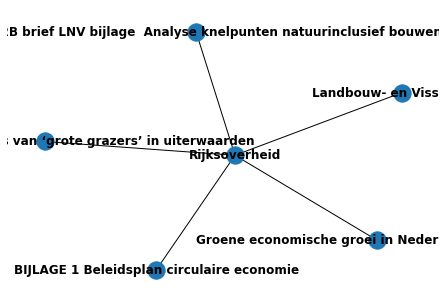

<Figure size 1080x1080 with 0 Axes>

In [10]:
# creating the graph
G = nx.Graph()
# print(G.nodes()) # returns a list
# print(G.edges()) # returns a list

# adding nodes
G.add_node("Rijksoverheid")
G.add_nodes_from(["Contaminatie in het vlees van ‘grote grazers’ in uiterwaarden",
                  "Groene economische groei in Nederland (Green Deal)",
                  "BIJLAGE 1 Beleidsplan circulaire economie",
                  "Bijlage 2B brief LNV bijlage  Analyse knelpunten natuurinclusief bouwen", 
                  "Landbouw- en Visserijraad"])

# adding edges
G.add_edges_from([("Rijksoverheid","Contaminatie in het vlees van ‘grote grazers’ in uiterwaarden"), 
                  ("Rijksoverheid","Groene economische groei in Nederland (Green Deal)"), 
                  ("Rijksoverheid","BIJLAGE 1 Beleidsplan circulaire economie"), 
                  ("Rijksoverheid", "Bijlage 2B brief LNV bijlage  Analyse knelpunten natuurinclusief bouwen"), 
                  ("Rijksoverheid", "Landbouw- en Visserijraad")])

# drawing the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.figure(figsize = (15, 15))
plt.show()

### Automated network

In [11]:
# Check and remove duplicates in document IDs
def get_docIDs_per_author(name_participant):
    list_docTitles_per_author = []
#     list_docIDs_per_author = []
    for i in documents:
        if str.lower(name_participant) in str.lower(i['content']):
            list_docTitles_per_author.append(i['document_title'])
#             list_docIDs_per_author.append(i['document_identifier'])
    myset = set(list_docTitles_per_author)
    list_docTitles_per_author = list(myset)
    return name_participant, list_docTitles_per_author

In [12]:
# Change this to person you are searching for
name_person, listOfDocs_per_participant = get_docIDs_per_author('Hoekstra')

In [13]:
print(name_person)
print(listOfDocs_per_participant)
# print(listOfDocIDs_per_participant)

Hoekstra
['Antwoord op vragen van de leden Van Raan en Teunissen over “de door Nederland uitgesproken steun aan diepzeemijnbouw”', 'Lijst van ingekomen stukken', 'Besluitenlijst - procedurevergadering LNV d.d. 23 februari 2022', 'Antwoord op vragen van de leden Wassenberg en Teunissen over de VN-conferentie over de VN-conferentie over het wereldzeeënverdrag', 'Fiche: Mededeling EU-Bodemstrategie voor 2030', 'Bijlage 2B brief LNV bijlage  Analyse knelpunten natuurinclusief bouwen', 'Antwoord op vragen van de leden Tjeerd de Groot en Sjoerdsma over VN Intergovernmental Conference on Marine Biodiversity of areas Beyond National Jurisdiction (BBNJ)']


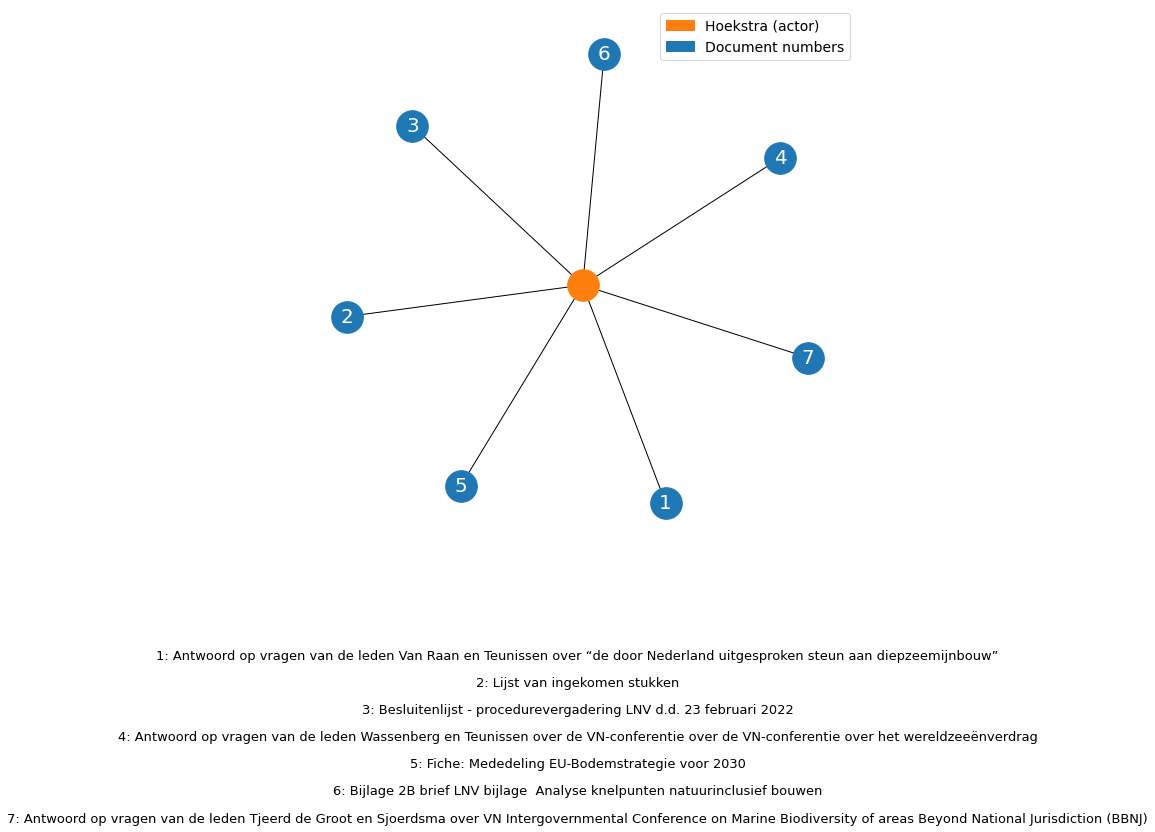

In [14]:
# Create a dictionary to map document names to numbers
doc_dict = {listOfDocs_per_participant[i]: i+1 for i in range(len(listOfDocs_per_participant))}

# Create a graph with a central actor node and three document nodes
G = nx.Graph()
G.add_node(name_person)
for doc in listOfDocs_per_participant:
    G.add_node(doc)
    G.add_edge(name_person, doc)

plt.figure(figsize=(10, 10))

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[name_person], node_color='#ff7f0e', node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=listOfDocs_per_participant, node_color='#1f77b4', node_size=1000)

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=doc_dict, font_size=20, font_color='white')

# Create a legend with the translations of the node labels to document names
legend_labels = [f"{i+1}: {listOfDocs_per_participant[i]}" for i in range(len(doc_dict))]
legend_labels.reverse()

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='#ff7f0e', label='{} (actor)'.format(name_person))
blue_patch = mpatches.Patch(color='#1f77b4', label='Document numbers')

plt.legend(handles=[red_patch, blue_patch], loc='best', fontsize=14)

# Add the label lines at the bottom of the figure
y_pos = -0.15 - (len(legend_labels) * 0.05)
for line in legend_labels:
    plt.text(0.5, y_pos, line, fontsize=13, ha='center', transform=plt.gca().transAxes)
    y_pos += 0.05

plt.axis('off')
plt.savefig('example1_as_actor.png')